# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [4]:
df_raw = pd.read_csv('demo01.csv')
df_raw.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [5]:
#Tirar as duplicações e deixar numa variável nova
df = df_raw.drop_duplicates().copy()

In [6]:
# Convetendo object em int por mapeamento

df['sexo'] = df['sexo'].map({'F': 1, 'M':0})
df['posse_de_veiculo'] = df['posse_de_veiculo'].map({'Y': 1, 'N':0})
df['posse_de_imovel'] = df['posse_de_imovel'].map({'Y': 1, 'N':0})
df['mau'] = df['mau'].map({True: 1, False:0})

In [7]:
# Realizar os dummies
df_dummy = pd.get_dummies(df, columns=['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])
df_dummy.dtypes

sexo                                        int64
posse_de_veiculo                            int64
posse_de_imovel                             int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int64
tipo_renda_Commercial associate              bool
tipo_renda_Pensioner                         bool
tipo_renda_State servant                     bool
tipo_renda_Student                           bool
tipo_renda_Working                           bool
educacao_Academic degree                     bool
educacao_Higher education                    bool
educacao_Incomplete higher                   bool


In [8]:
# Realizar os dummies
df_dummy = pd.get_dummies(df, columns=['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])
df_dummy.dtypes

sexo                                        int64
posse_de_veiculo                            int64
posse_de_imovel                             int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int64
tipo_renda_Commercial associate              bool
tipo_renda_Pensioner                         bool
tipo_renda_State servant                     bool
tipo_renda_Student                           bool
tipo_renda_Working                           bool
educacao_Academic degree                     bool
educacao_Higher education                    bool
educacao_Incomplete higher                   bool


In [9]:
#Separação das bases
y = df_dummy.mau
X = df_dummy.drop('mau', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

AttributeError: 'float' object has no attribute 'round'

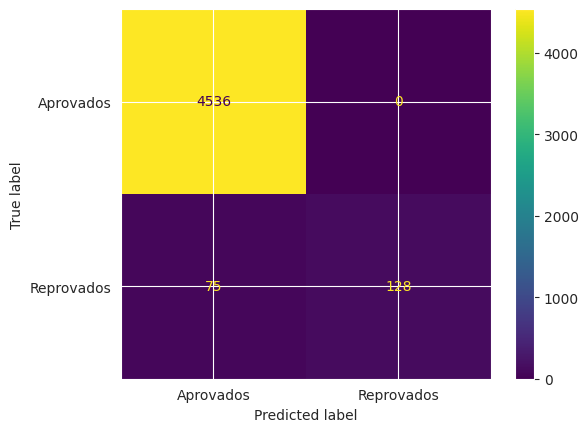

In [10]:
#Modelo

clf1 = DecisionTreeClassifier(random_state=123)
clf1 = clf1.fit(X_train, y_train)

y_predict_train = clf1.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp_train.plot()
print(f'Acuracia em Treino: {(accuracy_score(y_train, y_predict_train)*100).round(2)}%')

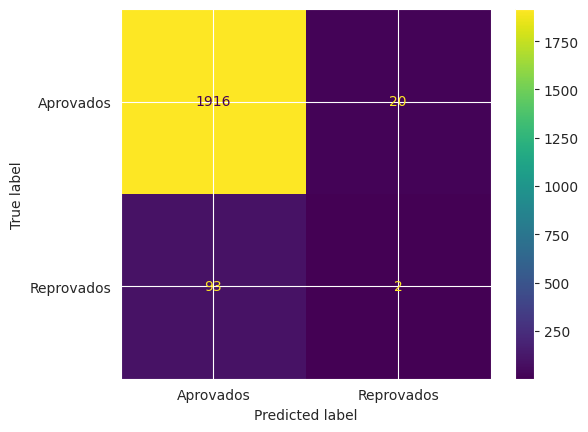

In [11]:
# Repita a análise da acurácia para a base de teste


# No outro modelo deve colocar os parâmetros

clf2 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=100, random_state=123)
clf2 = clf2.fit(X_train, y_train)
y_predict_test2 = clf2.predict(X_test)
cm2 = confusion_matrix(y_test, y_predict_test2)
disp_test2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['Aprovados', 'Reprovados'])
disp_test2.plot()

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

3. Dados duplicados 

Outras variáveis

In [12]:
clf_dt = DecisionTreeClassifier(random_state=100)
clf_dt

DecisionTreeClassifier(random_state=100)

In [13]:
clf_dt = clf_dt.fit(X,y)
clf_dt

DecisionTreeClassifier(random_state=100)

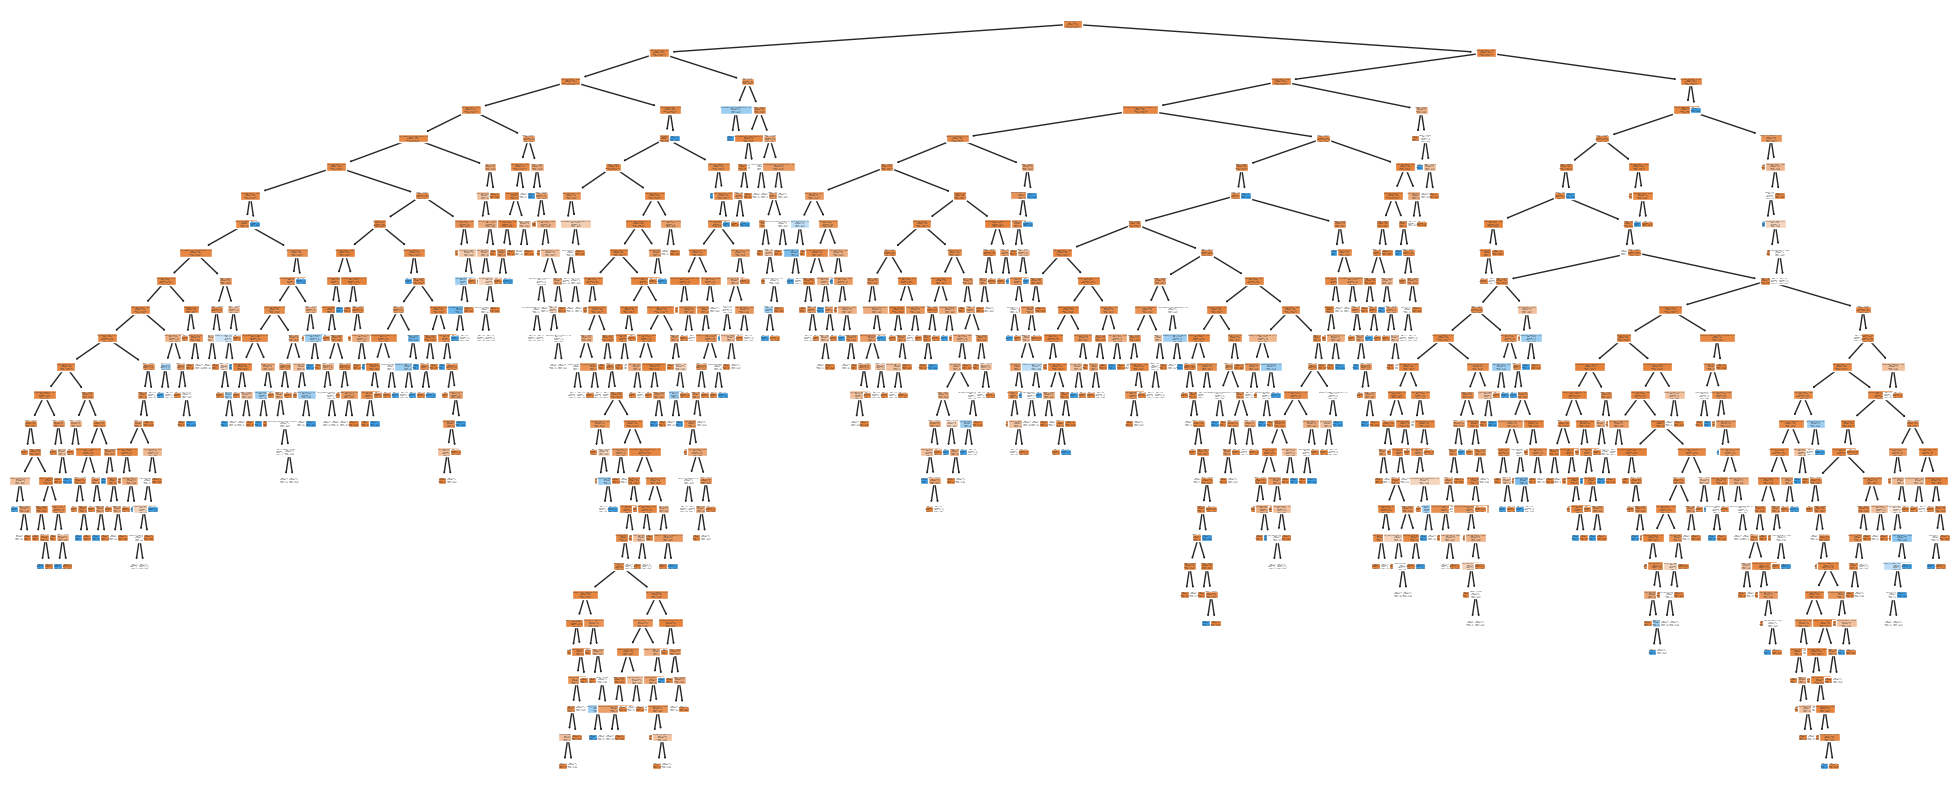

In [14]:
plt.figure(figsize=(25, 10))
plot_tree(clf_dt,
          filled=True,
          class_names=['sexo', 'mau'],
          feature_names=list(X.columns));

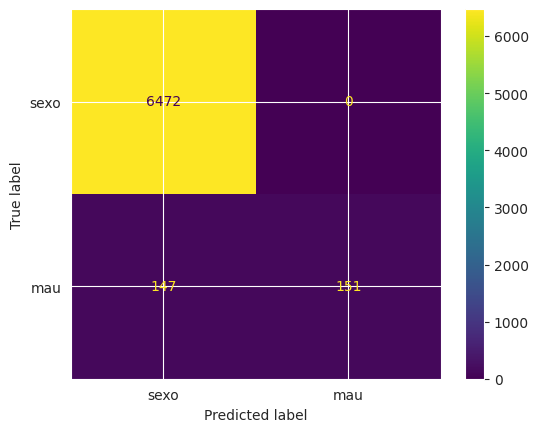

In [15]:
cm = confusion_matrix(y, clf_dt.predict(X), labels=clf_dt.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['sexo', 'mau'])

MatrizDeConfusao.plot();

In [18]:
accuracy_score(y_train, y_predict_train)

0.9841738763452205

In [20]:
# Calcular a acurácia
train_accuracy = accuracy_score(y_train, y_predict_train)
print(f"Acurácia na base de treinamento: {train_accuracy * 100:.2f}%")


Acurácia na base de treinamento: 98.42%


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

Acurácia na base de teste: 91.24%


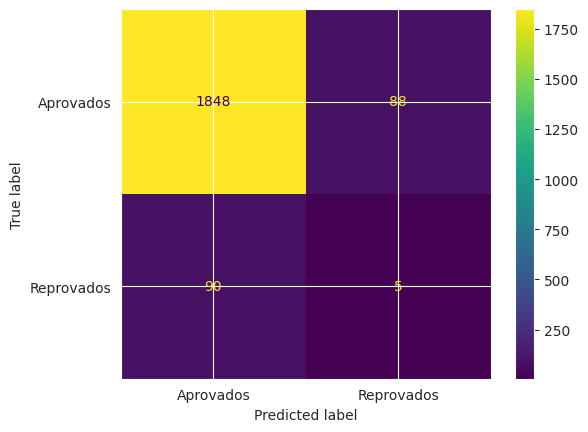

In [21]:
# Predição da base de teste usando clf1 treinado no item 2
y_predict_test = clf1.predict(X_test)

# Visualização da matriz de confusão
cm_test = confusion_matrix(y_test, y_predict_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Aprovados', 'Reprovados'])
disp_test.plot()

# Calcular a acurácia da base de teste
test_accuracy = accuracy_score(y_test, y_predict_test)
print(f"Acurácia na base de teste: {test_accuracy * 100:.2f}%")


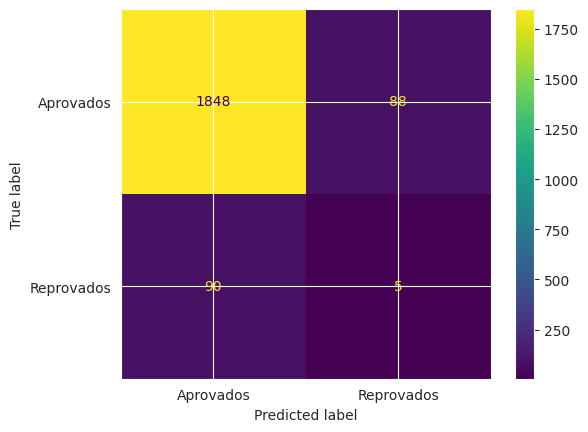

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Faça a previsão para a base de teste
y_predict_test = clf1.predict(X_test)

# Crie a matriz de confusão
cm_test = confusion_matrix(y_test, y_predict_test)

# Visualize a matriz de confusão
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Aprovados', 'Reprovados'])
disp_test.plot()


In [23]:
from sklearn.metrics import accuracy_score

# Cálculo da acurácia na base de treinamento
train_accuracy = accuracy_score(y_train, y_predict_train)
print(f"Acurácia na base de treinamento: {train_accuracy * 100:.2f}%")

# Cálculo da acurácia na base de teste
test_accuracy = accuracy_score(y_test, y_predict_test)
print(f"Acurácia na base de teste: {test_accuracy * 100:.2f}%")

# Comparação
if train_accuracy > test_accuracy:
    print("O modelo apresenta melhor desempenho na base de treinamento, indicando possível overfitting.")
elif train_accuracy < test_accuracy:
    print("O modelo apresenta melhor desempenho na base de teste, o que é incomum.")
else:
    print("O modelo possui desempenho equilibrado entre treino e teste, o que é desejável.")


Acurácia na base de treinamento: 98.42%
Acurácia na base de teste: 91.24%
O modelo apresenta melhor desempenho na base de treinamento, indicando possível overfitting.


Proporção de proponentes classificados como 'maus': 0.44%


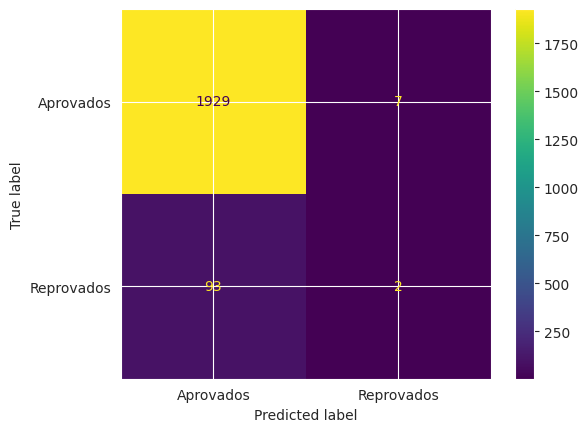

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Treine a nova árvore com os parâmetros fornecidos
clf_new = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf_new = clf_new.fit(X_train, y_train)

# Predição na base de teste
y_predict_test_new = clf_new.predict(X_test)

# Matriz de confusão
cm_new = confusion_matrix(y_test, y_predict_test_new)
disp_new = ConfusionMatrixDisplay(confusion_matrix=cm_new, display_labels=['Aprovados', 'Reprovados'])
disp_new.plot()

# Calcular a proporção de proponentes classificados como "maus" (rótulo "1")
num_maus = sum(y_predict_test_new == 1)
proportion_maus = num_maus / len(y_predict_test_new)
print(f"Proporção de proponentes classificados como 'maus': {proportion_maus * 100:.2f}%")


In [25]:
# Contar o número de contratos "bons" (rótulo 0) na base de teste
num_bons = sum(y_test == 0)

# Calcular a proporção de contratos "bons"
accuracy_all_bons = num_bons / len(y_test)

# Exibir a acurácia
print(f"Acurácia classificando todos os contratos como 'bons': {accuracy_all_bons * 100:.2f}%")


Acurácia classificando todos os contratos como 'bons': 95.32%
